In [1]:
%matplotlib inline
from pylab import *

In [2]:
from deficit_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [3]:
_debug = False
if _debug:
    print("Debugging")

In [4]:
base='sims/2023-01-12'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
rf_size=19
eta=2e-6
sigma_c=1
blur=10
mu_c=13
open_eye_noise=0.1
number_of_neurons=25
number_of_processes=4

seq=pn.Sequence()

t=16*day
ts=1*hour

# DEBUG
if _debug:
    t=1*minute
    ts=1*second

seq+=blur_jitter_deficit(blur=[blur,-1],
                            total_time=t,
                            noise=open_eye_noise,
                            eta=eta,number_of_neurons=number_of_neurons,
                            mu_c=mu_c,sigma_c=sigma_c,
                            save_interval=ts)



asdf/bbsk081604_all.asdf
Using cache_images/cache_images_2d4973998e95890cd68475879c02e51f.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.

In [6]:
%%time
try:
    seq.run(display=None,display_hash=False,
               time_between_display=10*hour)
    #seq.run(display_hash=False)    
except KeyboardInterrupt:
    close()
    


[.] Sequence Time Elapsed...7 m, 33.94 s
CPU times: user 49min 56s, sys: 1min 5s, total: 51min 2s
Wall time: 7min 33s


(<Figure size 864x864 with 50 Axes>, <Figure size 864x864 with 25 Axes>)

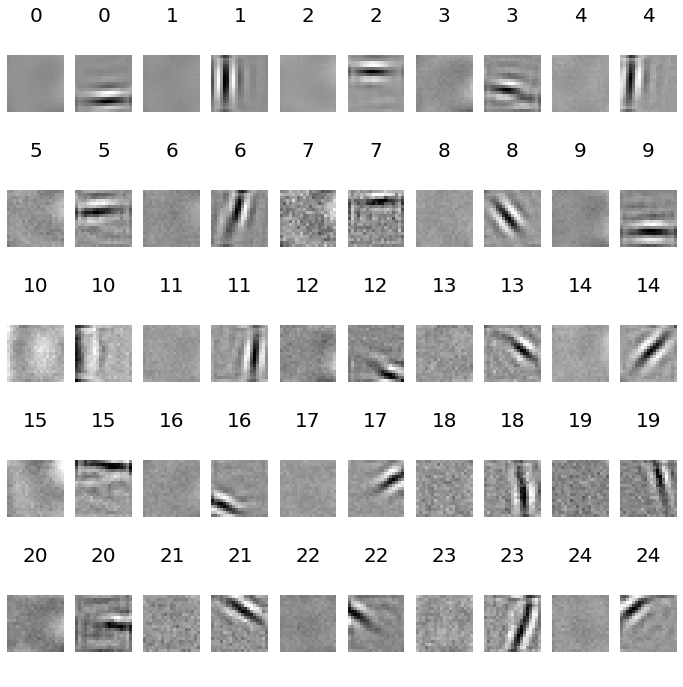

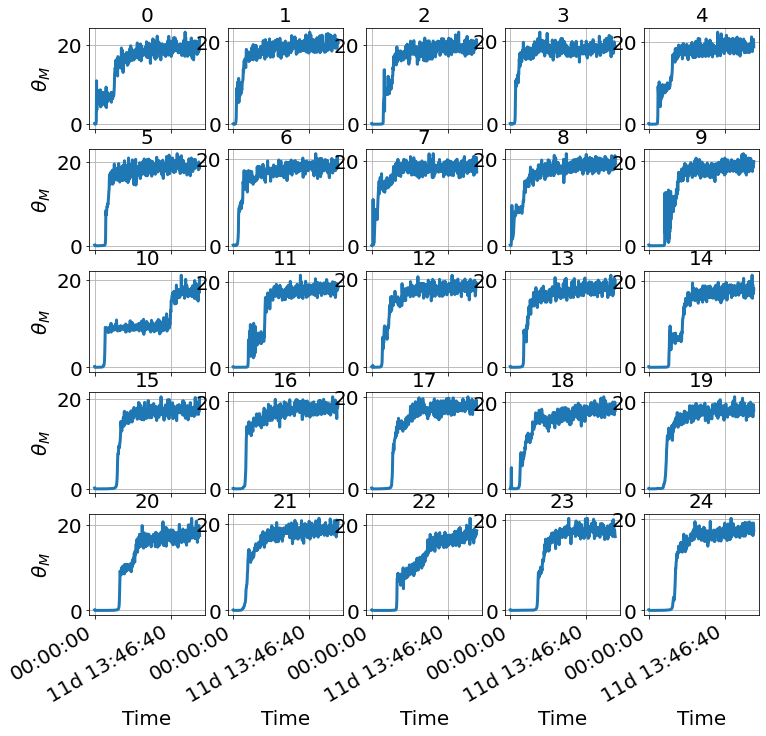

In [7]:
pn.utils.plot_rfs_and_theta_grid(seq.sims[0],seq.neurons[0],seq.connections[0])

In [8]:
pn.save(base+"/deficit_25.asdf",seq)

In [9]:
def seq_load(seq,fname):
    s,n,c=seq.sims[0],seq.neurons[0],seq.connections[0]
    
    assert len(c)==1,"Need to implement more then one connection"
    with asdf.open(fname) as af:
        L=af.tree['attrs']['sequence length']
        i=L-1  # last one
        m=af.tree['sequence %d' % i]['connection 0']['monitor weights'] 
        t,W=m['t'],m['values']
        W=np.array(W)
        t=np.array(t)
    
        
        m=af.tree['sequence %d' % i]['connection 0']['monitor theta']           
        t,theta=m['t'],m['values']
        theta=np.array(theta)
        
        c[0].initial_weights=W[-1]
        c[0].reset_to_initial=True
        c[0].initial_theta=theta[-1]        
        c[0]._reset()


In [12]:
seq=pn.Sequence()

t=10*day
ts=0.5*hour

# DEBUG
if _debug:
    t=1*minute
    ts=1*second

noise=0.1

seq+=fix_jitter(total_time=t,
         save_interval=ts,number_of_neurons=number_of_neurons,
        mu_c=mu_c,sigma_c=sigma_c,
         eta=eta,noise=noise)
seq_load(seq,base+"/deficit_25.asdf")    


asdf/bbsk081604_all.asdf
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.

In [13]:
try:
    seq.run(display=None,display_hash=False,
               time_between_display=10*hour)
except KeyboardInterrupt:
    close()
    


[.] Sequence Time Elapsed...4 m, 53.46 s


(<Figure size 864x864 with 50 Axes>, <Figure size 864x864 with 25 Axes>)

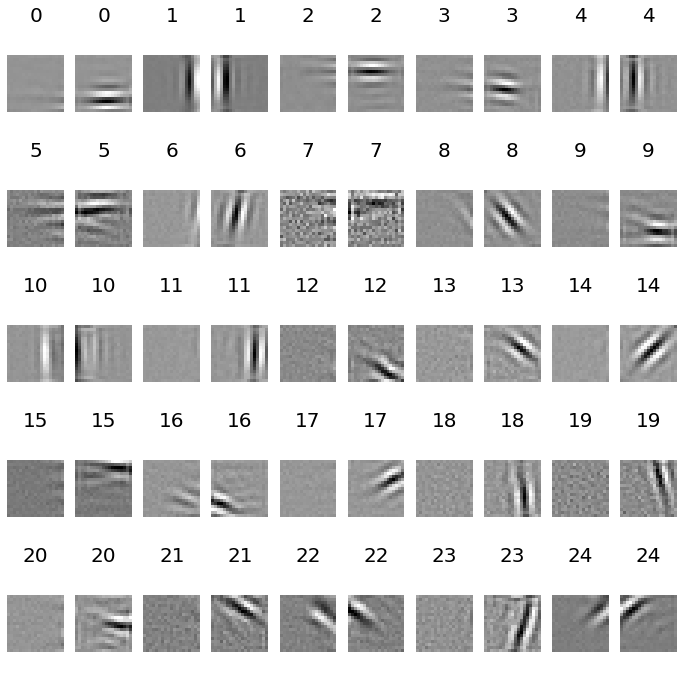

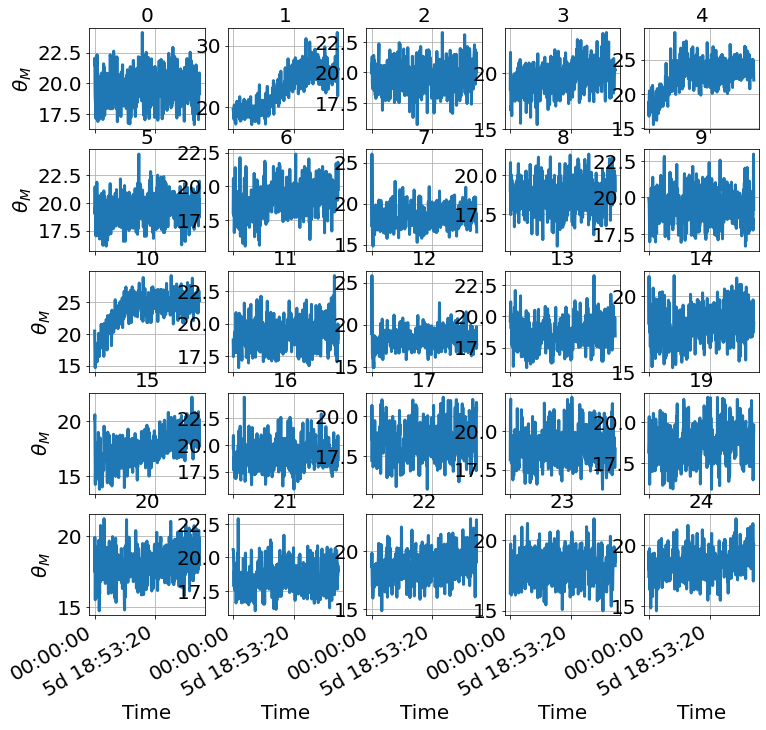

In [15]:
pn.utils.plot_rfs_and_theta_grid(seq.sims[-1],seq.neurons[-1],seq.connections[-1])

In [ ]:
def run_one_continuous_fix_jitter(params,overwrite=False):
    import plasticnet as pn
    count,eta,noise,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname

    seq=pn.Sequence()

    t=10*day
    ts=0.5*hour

    # DEBUG
    if _debug:
        t=1*minute
        ts=1*second

    
    seq+=fix(total_time=100*hour,
             save_interval=20*minute,number_of_neurons=params.number_of_neurons,
            mu_c=mu_c,sigma_c=sigma_c,
             eta=eta,noise=noise)
    seq_load(seq2,base+"/deficit_25.asdf")    

    seq.run(display_hash=False)
    pn.save(sfname,seq) 
    
    return sfname
    